In [29]:
import numpy as np
import pandas as pd
import scipy.stats as stats
df=pd.read_csv("/content/Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [2]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


examine distributions

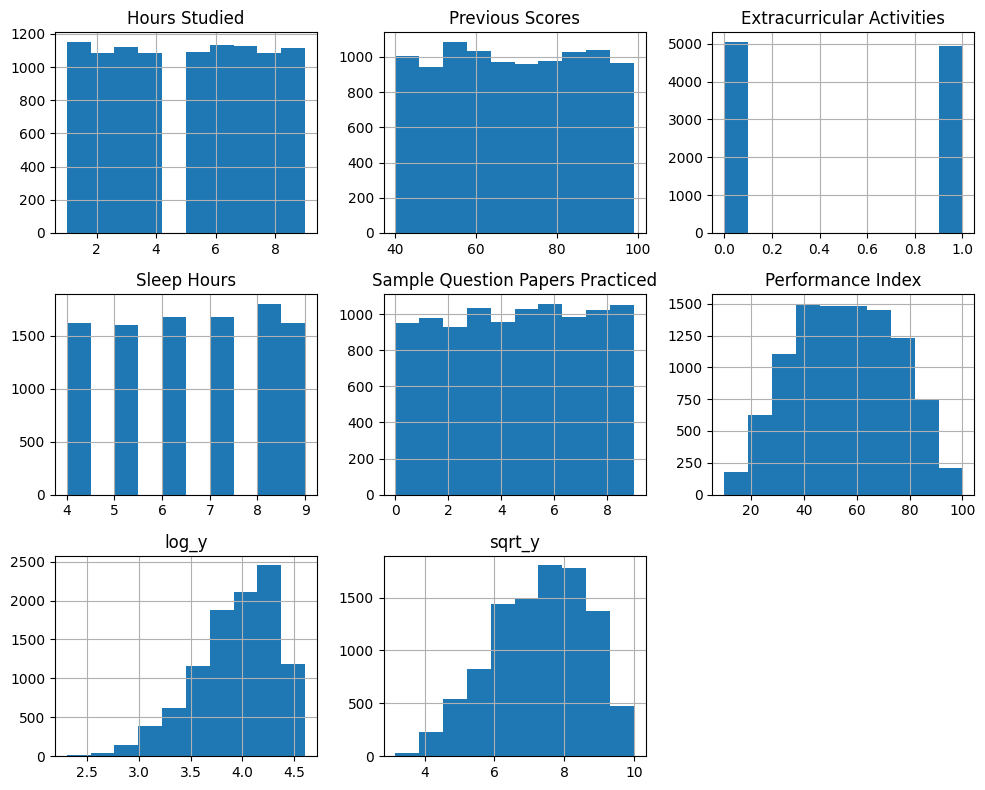

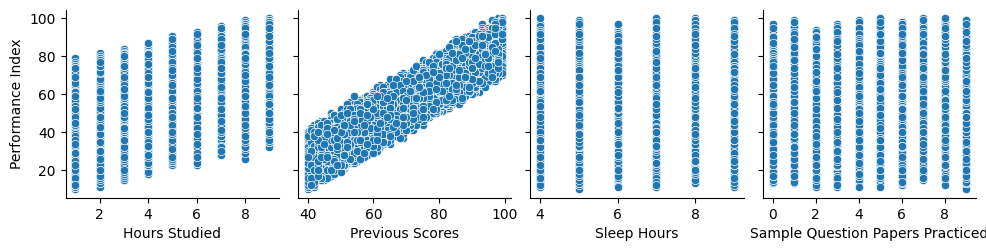

In [23]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()
# Create scatter plots
sns.pairplot(df, x_vars=['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced'],
             y_vars=['Performance Index'], kind='scatter')
plt.show()

Fit the Multivariable Regression Model

In [24]:
import statsmodels.api as sm

# Prepare the data
X = df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables
y = df['Performance Index']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.147e+05
Date:                Sat, 17 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:42:42   Log-Likelihood:                -21418.
No. Observations:               10000   AIC:                         4.285e+04
Df Residuals:                    9995   BIC:                         4.288e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

Plot Residuals

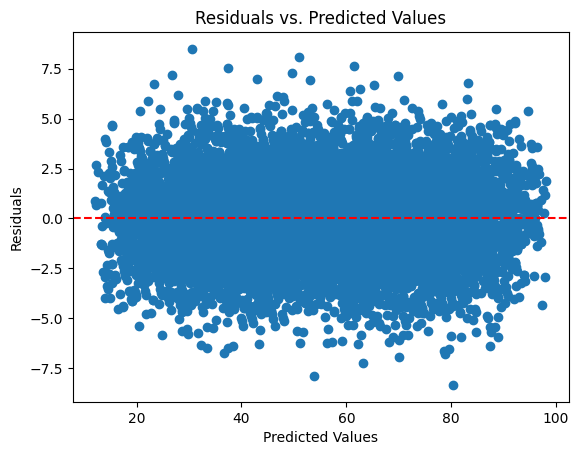

In [25]:
# Calculate residuals
predictions = model.predict(X)
residuals = y - predictions

# Scatter plot of residuals vs. predicted values
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


remove outliers

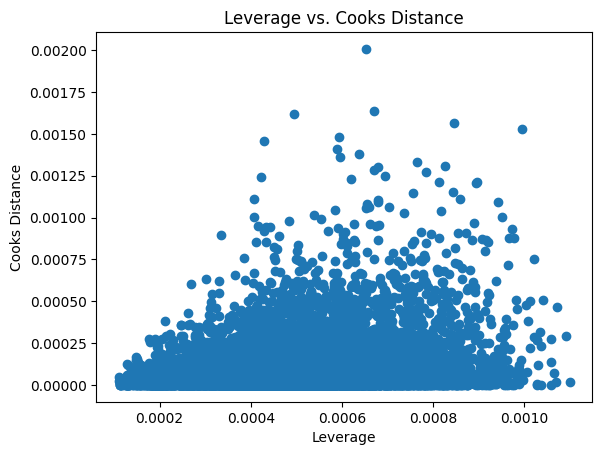

Potential outliers:
      Leverage  Cooks Distance
7     0.000674        0.000515
15    0.000486        0.000521
55    0.000702        0.000413
106   0.000689        0.000515
140   0.000513        0.000489
...        ...             ...
9938  0.000585        0.000488
9954  0.000510        0.000523
9971  0.000743        0.000530
9978  0.000435        0.000418
9994  0.000628        0.000734

[515 rows x 2 columns]


In [27]:
influence = model.get_influence()
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance[0]

plt.scatter(leverage, cooks_d)
plt.xlabel('Leverage')
plt.ylabel('Cooks Distance')
plt.title('Leverage vs. Cooks Distance')
plt.show()

#investigate outlier
outliers = pd.DataFrame({'Leverage': leverage, 'Cooks Distance': cooks_d})
outliers = outliers[outliers['Cooks Distance'] > 4 / len(df)]  # Common threshold for Cooks Distance

print("Potential outliers:")
print(outliers)

Assess Residual Normality

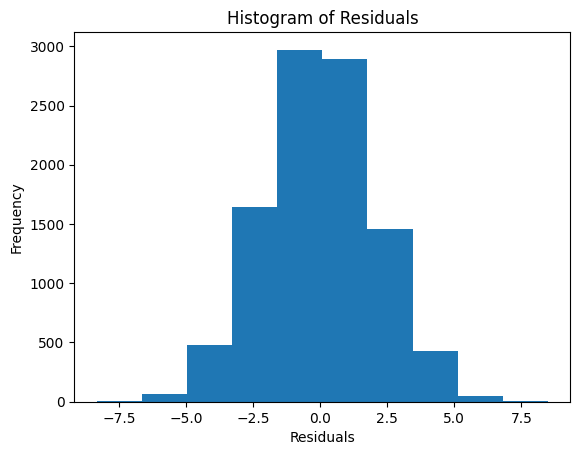

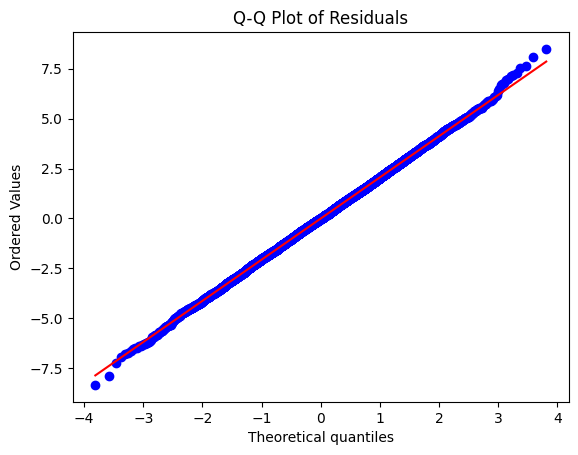

In [30]:
# Histogram of residuals
plt.hist(residuals, bins=10)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

Perform Sensitivity Analysis


In [31]:
# Fit model without outliers
df_clean = df[~df.index.isin(outliers.index)]
X_clean = df_clean[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']]
X_clean = pd.get_dummies(X_clean, drop_first=True)
y_clean = df_clean['Performance Index']
X_clean = sm.add_constant(X_clean)

model_clean = sm.OLS(y_clean, X_clean).fit()
print(model_clean.summary())


                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 2.579e+05
Date:                Sat, 17 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:46:09   Log-Likelihood:                -19119.
No. Observations:                9485   AIC:                         3.825e+04
Df Residuals:                    9480   BIC:                         3.828e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

Implement Remedial Measures

In [32]:
# Adding interaction terms
X_interaction = X.copy()
X_interaction['Hours Studied * Previous Scores'] = X['Hours Studied'] * X['Previous Scores']

# Fit the model with interaction terms
model_interaction = sm.OLS(y, X_interaction).fit()
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.718e+05
Date:                Sat, 17 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:47:49   Log-Likelihood:                -21418.
No. Observations:               10000   AIC:                         4.285e+04
Df Residuals:                    9994   BIC:                         4.289e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.718e+05
Date:                Sat, 17 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:17:00   Log-Likelihood:                -21418.
No. Observations:               10000   AIC:                         4.285e+04
Df Residuals:                    9994   BIC:                         4.289e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

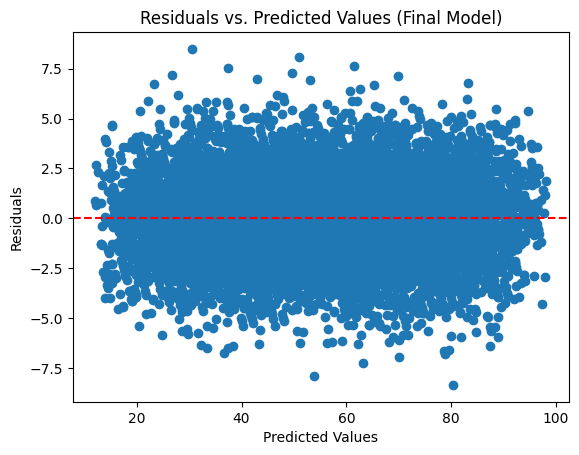

In [35]:
# Final model assessment
X_final = X_interaction  # Assuming the final model uses interaction terms
model_final = sm.OLS(y, X_final).fit()
print(model_final.summary())

# Check assumptions
# For example: residuals vs. fitted values
predictions_final = model_final.predict(X_final)
residuals_final = y - predictions_final

plt.scatter(predictions_final, residuals_final)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Final Model)')
plt.show()
